<a href="https://colab.research.google.com/github/Mohammed70S/MNIST-Classification-with-Keras/blob/main/MNIST_Classification_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion MNIST Classification using Neural Networks in Keras

# Objective:
# This project aims to classify images of clothing items from the Fashion MNIST dataset using a deep neural network
# built with Keras. The network will predict one of 10 fashion categories for each image. The goal is to achieve
# high accuracy on the test set by designing an efficient model and employing regularization techniques.

# Description of the Fashion MNIST Dataset:
# The Fashion MNIST dataset is a popular benchmark dataset for image classification tasks. It contains
# 70,000 grayscale images of 28x28 pixels, representing 10 different categories of clothing:
# - T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot
# The dataset is divided into 60,000 training images and 10,000 test images.

# Instructions for Running the Code:
# 1. Ensure that you have all the required dependencies installed.
# 2. Run each cell in order, following the steps of loading data, preprocessing, model building, training,
#    and evaluation.

# Dependencies and Installation:
# - This code requires Python with TensorFlow, Keras, numpy, scikit-learn, matplotlib, and seaborn libraries.
# - To install the necessary dependencies, run:
#       !pip install numpy tensorflow scikit-learn matplotlib seaborn

# Expected Results:
# - After training, the model should achieve an accuracy of at least 85-90% on the test set.
# - The code will output classification metrics including precision, recall, and F1-score for each class,
#   and a confusion matrix heatmap to visualize the model's predictions.

# ---- Code Implementation ----



In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Normalize the dataset

In [ ]:
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)


# Flatten the 28x28 images into 1D arrays of size 784 for the neural network

In [ ]:
X_train = X_train.reshape(-1, 28*28)
X_val = X_val.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)


# Visualize some sample images with their labels


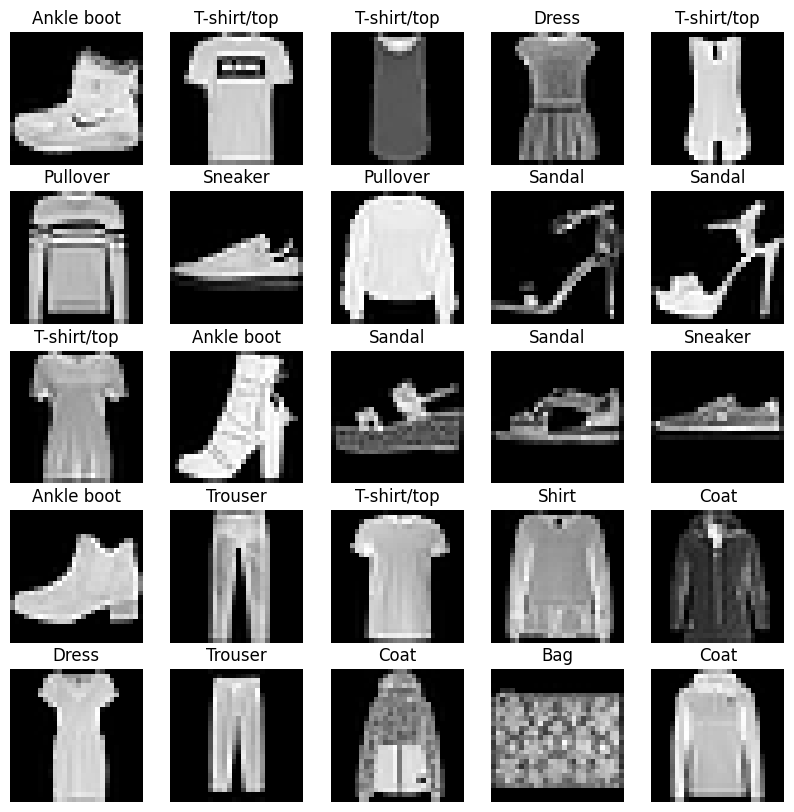

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train_full[i], cmap="gray")
    plt.title(class_names[y_train_full[i]])
    plt.axis("off")
plt.show()


# Import necessary components for model building
# Define the neural network model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

# Define the updated model with LeakyReLU activation
model = Sequential([
    Dense(256, input_shape=(784,)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.2),  # Dropout for regularization

    Dense(128),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.2),

    Dense(64),  # Additional hidden layer
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.2),

    Dense(10, activation='softmax')  # Output layer with 10 classes
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


# Compile the model with sparse categorical crossentropy as loss function and Adam optimizer

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Train the model on the training data and validate on validation data
# Define the learning rate schedule
# Callbacks for early stopping and learning rate scheduling

In [11]:
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

def lr_schedule(epoch):
    initial_lr = 0.0002
    return initial_lr

lr_scheduler = LearningRateScheduler(lr_schedule)
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=15, validation_data=(X_val, y_val),
                    callbacks=[early_stopping, lr_scheduler])


Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.8859 - loss: 0.3068 - val_accuracy: 0.8888 - val_loss: 0.3046 - learning_rate: 2.0000e-04
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.8921 - loss: 0.2925 - val_accuracy: 0.8893 - val_loss: 0.2987 - learning_rate: 2.0000e-04
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8924 - loss: 0.2891 - val_accuracy: 0.8919 - val_loss: 0.2934 - learning_rate: 2.0000e-04
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8974 - loss: 0.2814 - val_accuracy: 0.8901 - val_loss: 0.2988 - learning_rate: 2.0000e-04
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.8976 - loss: 0.2787 - val_accuracy: 0.8936 - val_loss: 0.2931 - learning_rate: 2.0000e-04
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8993 - loss: 0.2767 - val_accuracy: 0.8909 - val_loss: 0.2966 - learning_rate: 2.0000e-04
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11

# Evaluate the model on the test set

In [12]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8888 - loss: 0.3197
Test accuracy: 88.96%


 Generate predictions and print the classification report

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.83      0.87      0.85      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.82      0.79      0.80      1000
       Dress       0.90      0.89      0.89      1000
        Coat       0.77      0.87      0.81      1000
      Sandal       0.99      0.95      0.97      1000
       Shirt       0.75      0.66      0.70      1000
     Sneaker       0.93      0.97      0.95      1000
         Bag       0.97      0.98      0.98      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



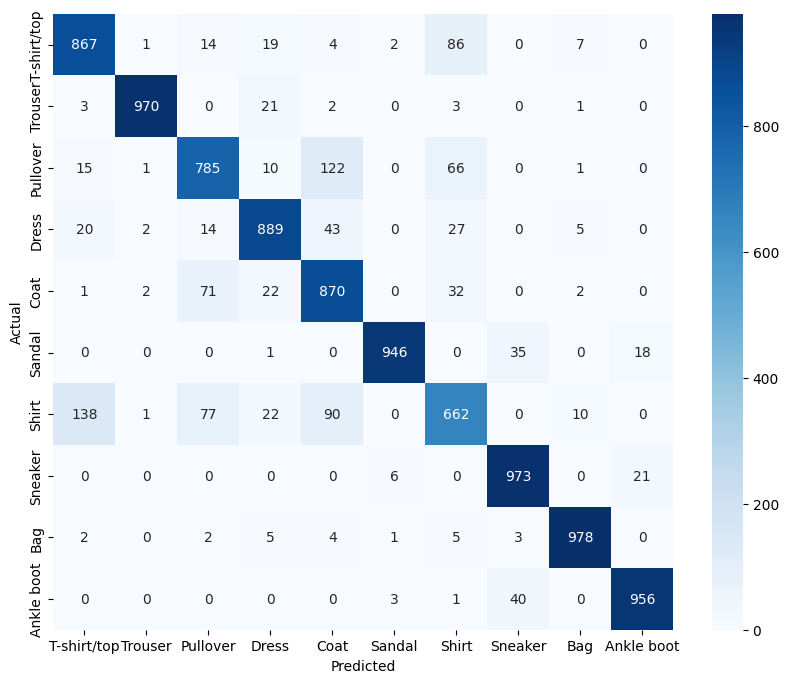

In [13]:
y_pred = np.argmax(model.predict(X_test), axis=1)
print(classification_report(y_test, y_pred, target_names=class_names))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


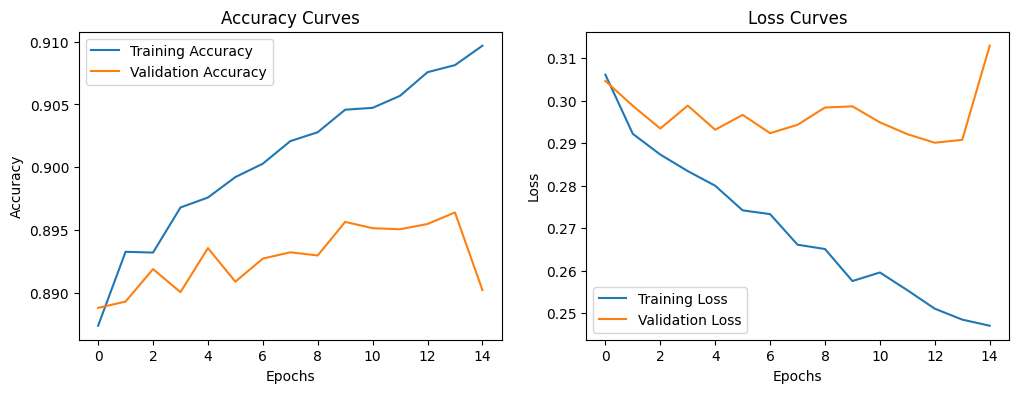

In [14]:
plt.figure(figsize=(12, 4))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curves')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curves')

plt.show()
